# Linear, and Regularized Logistic Regression


Two sets of input training data are evaluated in this note. First one is scores of two seperate exams which determine if a student is admitted in a university or not. This set  of training data seems to be linearly separable. The second set of data is a two-dimensional array specifications on a chip which are then classified as accepatable or not acceptable. This set of training data is not linearly separable.   

Importing required libraries and developed logistic regression class as ut

In [37]:

# -*- coding: utf-8 -*-
"""
Created on Wed Jan 13 18:35:28 2021

@author: zayn
"""

import sys
sys.path.append('../software/algorithms/')   

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import logistic_regression_utils as ut




# Linear Logistic Regression


 Loading Data...
 The first two columns contains the exam scores and the third column contains the label (Admitted or Not Admitted)

In [30]:
# importing logistic regression algorithm 
lgreg=ut.lgreg()


df=pd.read_csv('../data/logreg_data1.txt', names=['p1','p2','p3'])

data=df.values.astype(np.float64)

X=data[:,:-1]
y=data[:,-1]
m=len(y)

size = 1
for dim in np.shape(X): size *= dim
n=size//m

X.shape = (m, n)

  Let's start the by first plotting the data to understand the problem we are working with.

plotting data


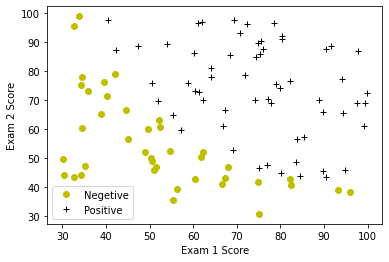

In [31]:

print('plotting data')

plt.close('all')

ax=lgreg.plotData(X,y, 'Exam 1 Score', 'Exam 2 Score')



implementing the cost and gradient for logistic regression. 

In [32]:

# Setup the data matrix appropriately, and add ones for the intercept term


#  Normalize features
Xn, mu, sig=lgreg.featureNormalize(X)
#  Add intercept term to x and X_test

Xn=np.append(np.ones([m,1]), Xn, axis=1)

#  Initialize fitting parameters
theta=np.zeros(n+1)

#  Compute and display initial cost and gradient
J, grad=lgreg.CostFunction(Xn, y, theta)

print('initial J, cost function is  \n')

print('{:0.5f} \n'.format(J))



initial J, cost function is  

0.69315 



finding the optimal parameters theta by minimizing the cost function using gradient descent algorithm 

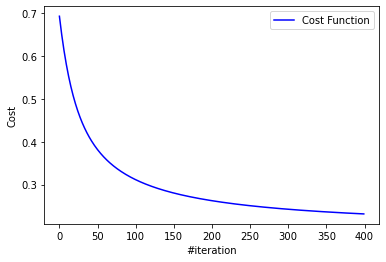

In [33]:

#set parameters for gradient descent algorithm
alpha=0.1
num_iters=400

#   Run gradientDescent to obtain the optimal theta
#   This function will return theta and the cost and the gradient history
theta, J_h=lgreg.gradientDescent(Xn, y, theta, alpha, num_iters)


# Plot the gradient descent history
fig, ax = plt.subplots()
ax.plot(J_h,'b-', label='Cost Function')
ax.set_xlabel('#iteration')
ax.set_ylabel('Cost')   
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1])





add computed linear classifier to the data plot

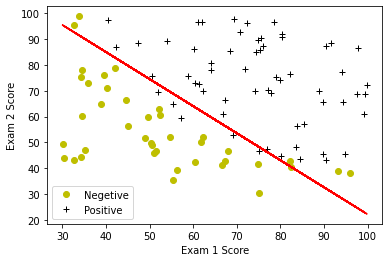

In [34]:
Xe=np.append(np.ones([m,1]), X, axis=1)

ax=lgreg.plotData(X,y, 'Exam 1 Score', 'Exam 2 Score')
ax.plot(Xe[:,1],-sig[1]*Xn[:,:2]@theta[:2]/theta[2]+mu[1], '-r')

## Prediction

Apply algorithm to predict After learning the parameters, weu'll like to use it to predict the outcomes on unseen data. We will use the logistic regression model to predict the probability that a student with score 53 on exam 1 and score 78 on exam 2 will be admitted.Furthermore, we will compute the training and test set accuracies of our model.

In [35]:

#Predict probability for a student with score 45 on exam 1 
#and score 85 on exam 2 

exam_score=np.array([53,78])
exam_score.shape=(2,1)

exam_scn=(exam_score-np.mean(exam_score))/sig

exam_scne=np.append([1],exam_scn)
exam_pred=lgreg.sigmoid(theta.T@exam_scne)

print('For a student with scores 45 and 85, we predict an admission ' \
         'probability of \n');
    
print('{:0.2f} \n'.format(exam_pred))




For a student with scores 45 and 85, we predict an admission probability of 

0.70 



## Compute accuracy on the training set

In [36]:
exam_pred_train=lgreg.predict(Xn, theta/(theta.T@theta))
num_correct=np.mean(y==exam_pred_train)

print('logistic regression Train Accuracy is : {:0.2f}% \n'.format(num_correct * 100.0));

logistic regression Train Accuracy is : 90.00% 



# Regularized Logistic Regression

In this part, we are given a dataset with data points that are not linearly separable. However, we would still like to use logistic regression to classify the data points. To do so, we introduce more features to use -- in particular, we add polynomial features to our data matrix (similar to polynomial regression).

Load data for the second example. The first two columns contains the X values and the third column contains the label (y).

In [21]:
df=pd.read_csv('../data/logreg_data2.txt', names=['p1','p2','p3'])
data=df.values.astype(np.float64)

X=data[:,:-1]
y=data[:,-1]
m=len(y)

size = 1
for dim in np.shape(X): size *= dim
n=size//m

X.shape = (m, n)



Plotting the data to understand the problem we are working with.

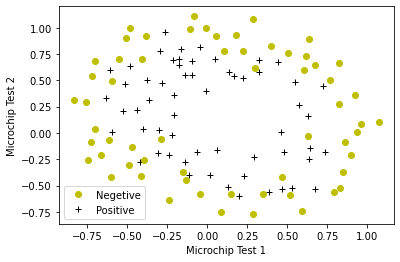

In [22]:
ax=lgreg.plotData(X,y, 'Microchip Test 1', 'Microchip Test 2')

## Add Polynomial Features.

Note that mapFeature also adds a column of ones for us, so the intercept term is handled

In [23]:
Xn, mu, sig=lgreg.featureNormalize(X)

Xo=lgreg.mapFeature(Xn[:,0], Xn[:,1])





Cost at initial theta (zeros): 0.69



 Initialize fitting parameters, and set regularization parameter lambda to prevent overfitting



In [27]:


size = 1
for dim in np.shape(Xo): size *= dim
n1=size//m
rlambda=1
#  Compute and display initial cost and gradient for regularized logistic
#  regression
theta=np.zeros(n1)

J, grad=lgreg.CostFunction(Xo, y, theta, rlambda)
print('Cost at initial theta (zeros): {:0.2f}\n'.format(J));

Cost at initial theta (zeros): 0.69



##  Regularization and Accuracies



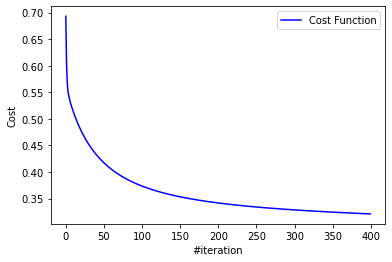

In [24]:
rlambda=1
alpha=0.1
num_iters=400
# Optimize
theta, J_h=lgreg.gradientDescent(Xo, y, theta, alpha, num_iters)


# Plot cost history to verify that it's decreasing, and converges
fig, ax = plt.subplots()
ax.plot(J_h,'b-', label='Cost Function')
ax.set_xlabel('#iteration')
ax.set_ylabel('Cost')   
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1])




## Decision Boundary

 Plot obtained boundary using contour plot 


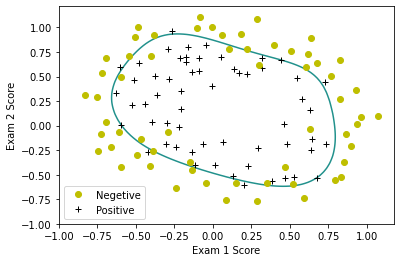

In [25]:

ax=lgreg.plotData(X,y, 'Exam 1 Score', 'Exam 2 Score')


xp0=np.linspace(-1, 1, 100)
xp0.shape=(len(xp0),1)

xp1=np.linspace(-1, 1, 110)
xp1.shape=(len(xp1),1)



Cpr=np.zeros([len(xp0), len(xp1)])

for ii in range(len(xp0)):
    xc0=(xp0[ii]-mu[0])/sig[0]
    for jj in range(len(xp1)):
        xc1=(xp1[jj]-mu[1])/sig[1]
        xcf=lgreg.mapFeature(xc0, xc1)
        Cpr[ii,jj]=lgreg.predict(xcf, theta, True)
        
Xm1, Xm2=np.meshgrid(xp0,xp1)

ax.contour(Xm1, Xm2, Cpr.T, 1)


Compute accuracy on our training set

In [26]:

exam_pred_train=lgreg.predict(Xo, theta/(theta.T@theta))
num_correct=np.mean(y==exam_pred_train)

print('Reguralarized linear regression Train Accuracy if : {:0.2f}% \n'.format(num_correct * 100.0));

Reguralarized linear regression Train Accuracy if : 84.75% 

